In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

datetime.datetime(2017, 2, 6, 0, 0)

Median people/second 0.0 
Average people/second 8.62744894538 
Mode people/second 0    0.0
dtype: float64 
Data Range = 2017-01-29 22:21:12.412723 2017-02-05 23:59:59.743346
Number of signatures = 1.854844 m


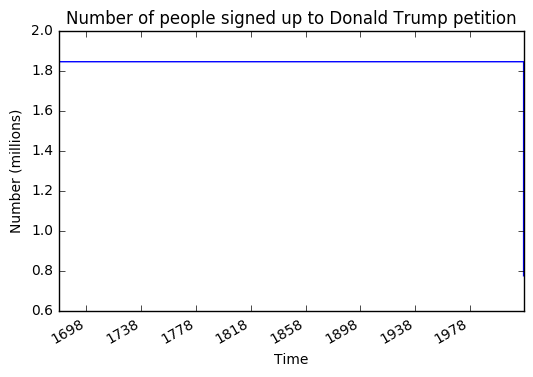

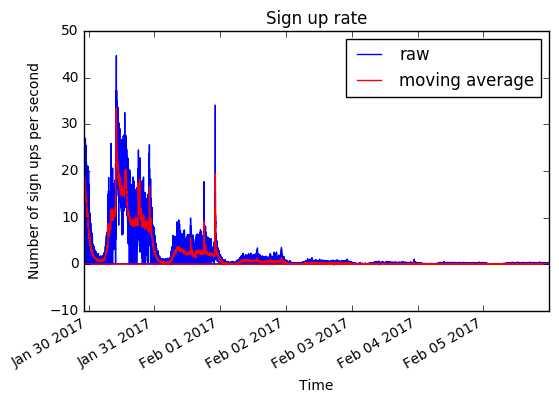

In [15]:
data = pd.read_csv('petition.csv')
data.columns = ['date','number']
data.date = pd.to_datetime(data.date)
data.date = data.date[data.date <= dt.datetime(year=2017,month=2,day=6)]
print 'Median people/second', (data.number.diff()).median(),''
print 'Average people/second', (data.number.diff()).mean(),''
print 'Mode people/second', (data.number.diff()).mode(),''
print 'Data Range =',data.date.min(),data.date.max()
print 'Number of signatures =',data.number.max()/1000000.0,'m'
fig = plt.figure(facecolor='white')
plt.title('Number of people signed up to Donald Trump petition')
plt.plot(data.date,data.number/1000000.0)
plt.xlabel('Time')
plt.ylabel('Number (millions)')
fig.autofmt_xdate()
plt.show()

convolve_size = 25
fig = plt.figure(facecolor='white')
plt.title('Sign up rate')
plt.plot(data.date[:-convolve_size],data.number.diff()[:-convolve_size]/10.0,label='raw')
plt.plot(data.date[:-convolve_size],(pd.np.convolve(pd.np.ones(convolve_size),data.number.diff(),mode='same')/float(convolve_size*10.0))[:-convolve_size],c='red',label='moving average')
plt.xlabel('Time')
plt.ylabel('Number of sign ups per second')
plt.legend()
plt.xlim(data.date.min(),data.date.max())
# for i in xrange(24):
#     plt.axvline(dt.datetime(year=2017,month=1,day=30,hour=i),color='green')
#     plt.axvline(dt.datetime(year=2017,month=1,day=30,minute=30,hour=i),color='pink')
fig.autofmt_xdate()
plt.show()